<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/60days%20ARIMA%20prediction%20short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Prediction for a maximun ofsix months 

In [94]:
!pip install pmdarima
import pmdarima as pm
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random
!pip install pandas 
import pandas as pd
x=pd.read_csv('/content/newntflixs.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
x

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/07/2022,176.490005,180.100006,174.270004,179.949997,179.949997,5201600
1,5/07/2022,176.279999,185.919998,172.679993,185.880005,185.880005,7334300
2,6/07/2022,185.199997,186.220001,180.820007,184.059998,184.059998,5753400
3,7/07/2022,184.270004,190.210007,183.500000,189.270004,189.270004,6334500
4,8/07/2022,186.020004,189.910004,182.750000,186.979996,186.979996,5835700
...,...,...,...,...,...,...,...
122,23/12/2022,296.179993,298.459991,291.910004,294.959991,294.959991,4251100
123,27/12/2022,293.190002,293.570007,282.130005,284.170013,284.170013,5778100
124,28/12/2022,281.920013,285.190002,273.410004,276.880005,276.880005,5964400
125,29/12/2022,283.179993,295.500000,281.010010,291.119995,291.119995,9588500


In [96]:
x['Date'] = pd.to_datetime(x['Date'])
x.set_index('Date',inplace=True)
x = x[['Open','High','Low','Close','Adj Close','Volume']]
x.info()
data = x.iloc[:int(0.8*len(x))]
print(data.shape)
testdata = x.iloc[int(0.8*len(x)):]
print(testdata.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2022-01-07 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       127 non-null    float64
 1   High       127 non-null    float64
 2   Low        127 non-null    float64
 3   Close      127 non-null    float64
 4   Adj Close  127 non-null    float64
 5   Volume     127 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.9 KB
(101, 6)
(26, 6)


(101, 6)
(26, 6)


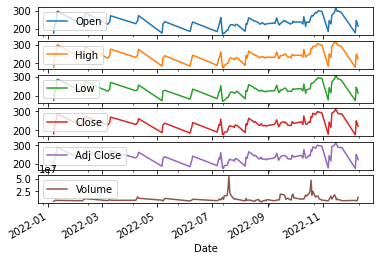

In [97]:
data = x.iloc[:int(0.8*len(x))]
print(data.shape)
testdata = x.iloc[int(0.8*len(x)):]
print(testdata.shape)
import matplotlib.pyplot as plt

data.plot(subplots=True)
plt.show()


In [99]:
model = pm.auto_arima(data
                      ['Adj Close'], 
                        m=4, seasonal=True,
                      start_p=1, start_q=1, max_order=2, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=718.323, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=716.302, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=719.449, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=719.402, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=715.859, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=717.987, Time=0.22 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=717.811, Time=0.27 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=718.276, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=717.836, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=717.984, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=717.875, Time=0.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 3.522 seconds


In [100]:
model.fit(data['Adj Close'])
model.fit(data['Adj Close'])
forecast=model.predict(n_periods=len(testdata), return_conf_int=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 18.724541231005052
MAPE: 0.0476625442023645
MSE 350.6084443116082
MAE: 14.734612384615392


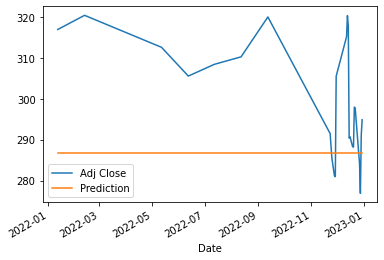

In [102]:
forecast_df = pd.DataFrame()
forecast_df['Prediction'] = forecast[0]
forecast_df.set_index(testdata.index,inplace=True)
new_model = pd.concat([testdata['Adj Close'],forecast_df],axis=1)
new_model.replace([np.inf, -np.inf], np.nan, inplace=True)
new_model.dropna(inplace=True)
new_model.plot()
new_model
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(forecast_df['Prediction'] - testdata['Adj Close']))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((forecast_df['Prediction']  - testdata['Adj Close'])**2))
mape = np.mean(np.abs(forecast_df['Prediction']  - testdata['Adj Close']) / testdata['Adj Close'])
mse=(np.mean((forecast_df['Prediction'] - testdata['Adj Close'])**2))


print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE", mse)
print("MAE:", mae)